In [1]:
root_name = 'SF_FLB_20180831'
print(root_name)

SF_FLB_20180831


In [2]:
import pandas as pd
df = pd.read_csv(root_name+'_ALL.csv',encoding='utf-8')
print(df.shape)
df.drop_duplicates(subset=['nick', 'content'], keep='last',inplace=True)
print(df.shape)
df.head()

(240, 17)
(240, 17)


,Unnamed: 0,No,page,nick,time,content,area,ip,length,against,agree,channel,hot,level,login_type,media_type,mid
0,0,1,1,旗鼓惊东强,2018-08-31 16:00:05,故伎重演的很真实？,甘肃嘉峪关,42.93.252.191,9,1535702405,0,jc,0,0,0,0,5B88F583-2A5DFCBF-13CCA64B4-8F9-8A4
1,1,2,1,用户6105250918,2018-08-31 15:49:50,帮他们拖回去，实在不行，作为靶船炸了，赔他们几百块,浙江绍兴,220.189.227.186,25,1535701790,0,jc,0,0,0,0,5B88F31E-DCBDE3BA-16BE6BC66-8F9-834
2,2,3,1,网际刀客,2018-08-31 15:41:42,立刻派出以辽宁舰为首的航母编队携天鲸号挖泥船为首的造岛工程机械前往事发海域实施人道主义紧急救...,河南许昌,222.89.165.152,50,1535701302,13,jc,0,0,0,0,5B88F136-DE59A598-A23B4A6F-8F9-8F1
3,3,4,1,天涯倦客,2018-08-31 15:39:06,哈哈，故伎重演！,山东青岛,123.234.40.218,8,1535701146,6,jc,0,0,0,0,5B88F099-7BEA28DA-56C6650F-8F9-88A
4,4,5,1,可爱东海大侠,2018-08-31 15:38:24,故技重演，要防止又一次坐滩，耐着不走。应迅速派军舰过去帮忙，或者派拖船过去，免费帮他拖回港口。,浙江台州,122.226.183.81,47,1535701104,12,jc,0,0,0,0,5B88F070-7AE2B751-537942A1-8F9-904


In [3]:
from datetime import datetime
def time2stamp(cmnttime):
    cmnttime = datetime.strptime(cmnttime, '%Y-%m-%d %H:%M:%S') 
    stamp = int(datetime.timestamp(cmnttime))
    return stamp
df['stamp'] = df['time'].apply(time2stamp)
df['time_ymd'] = df.time.apply(lambda x:x.split(' ')[0]) # 年月日
df['time_mdh'] = df.time.apply(lambda x:x.split(':')[0][5:]) #月日时 # 方便后续可视化时横坐标展示
df.head()

,Unnamed: 0,No,page,nick,time,content,area,ip,length,against,agree,channel,hot,level,login_type,media_type,mid,stamp,time_ymd,time_mdh
0,0,1,1,旗鼓惊东强,2018-08-31 16:00:05,故伎重演的很真实？,甘肃嘉峪关,42.93.252.191,9,1535702405,0,jc,0,0,0,0,5B88F583-2A5DFCBF-13CCA64B4-8F9-8A4,1535702405,2018-08-31,08-31 16
1,1,2,1,用户6105250918,2018-08-31 15:49:50,帮他们拖回去，实在不行，作为靶船炸了，赔他们几百块,浙江绍兴,220.189.227.186,25,1535701790,0,jc,0,0,0,0,5B88F31E-DCBDE3BA-16BE6BC66-8F9-834,1535701790,2018-08-31,08-31 15
2,2,3,1,网际刀客,2018-08-31 15:41:42,立刻派出以辽宁舰为首的航母编队携天鲸号挖泥船为首的造岛工程机械前往事发海域实施人道主义紧急救...,河南许昌,222.89.165.152,50,1535701302,13,jc,0,0,0,0,5B88F136-DE59A598-A23B4A6F-8F9-8F1,1535701302,2018-08-31,08-31 15
3,3,4,1,天涯倦客,2018-08-31 15:39:06,哈哈，故伎重演！,山东青岛,123.234.40.218,8,1535701146,6,jc,0,0,0,0,5B88F099-7BEA28DA-56C6650F-8F9-88A,1535701146,2018-08-31,08-31 15
4,4,5,1,可爱东海大侠,2018-08-31 15:38:24,故技重演，要防止又一次坐滩，耐着不走。应迅速派军舰过去帮忙，或者派拖船过去，免费帮他拖回港口。,浙江台州,122.226.183.81,47,1535701104,12,jc,0,0,0,0,5B88F070-7AE2B751-537942A1-8F9-904,1535701104,2018-08-31,08-31 15


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
df['cmntcount'] =int(df.shape[0])-df['No']
df['cmntcount'].head()

0    239
1    238
2    237
3    236
4    235
Name: cmntcount, dtype: int64

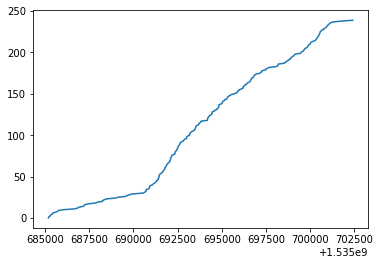

In [5]:
plt.plot(df.stamp, df.cmntcount);

In [6]:
from pyecharts import Bar, Line, Overlap


df_mdhmax = df.groupby('time_mdh')['cmntcount'].max()
df_mdhcount = df.groupby('time_mdh')['cmntcount'].count()
from pyecharts import Bar, Line, Overlap
bar = Bar("每小时评论数")
bar.add("小时", df_mdhcount.index, df_mdhcount.values,is_label_show=True,xaxis_interval=-90,
        xaxis_rotate=-90, yaxis_interval=200)
line = Line("每小时评论数")
line.add("小时", df_mdhmax.index, df_mdhmax.values,line_opacity=1,
         line_type='dotted', yaxis_interval=1000)

overlap = Overlap()
overlap.add(bar)
overlap.add(line, is_add_yaxis=True, yaxis_index=1)
#overlap.render() # 使用 render() 渲染生成 .html 文件
overlap

In [7]:
df[df.time_mdh.str.contains('08-09 14')]

,Unnamed: 0,No,page,nick,time,content,area,ip,length,against,...,channel,hot,level,login_type,media_type,mid,stamp,time_ymd,time_mdh,cmntcount


In [8]:



df.to_csv(root_name+'_Cleaned.csv', encoding='utf-8', line_terminator='\r\n')